# Анализ музыкального сервиса

В рамках анализа планируется провести сравнение поведения пользователей музыкального сервиса (Яндекс Музыка) из Москвы и Санкт-Петербурга. 

**Цель исследования** — проверить три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей были получены из файла `yandex_music_project.csv`. О качестве данных ничего не известно, поэтому перед проверкой гипотез, возможно, понадобится предобработка данных. Таким образом, исследование содержит три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.

## Краткие выводы по результатам анализа

1. **Первая гипотеза полностью подтвердилась**: день недели по-разному влияет на активность пользователей в Москве и Петербурге.

2. **Вторая гипотеза подтвердилась частично**: музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны только по понедельникам: в Москве слушают музыку жанра “world”, в Петербурге — джаз и классику.

3. **Третья гипотеза не подтвердилась**: во вкусах пользователей Москвы и Петербурга больше общего, чем различий.

## Обзор данных

Импортируем необходимые для проведения анализа данных библиотеки:

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Чтение JSON файла
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)

# Чтение CSV файла с использованием пути из JSON
dataset_path = config['dataset_path_music']
df = pd.read_csv(dataset_path)

Прочитаем файл `yandex_music_project.csv` с данными (путь к данным храниться в файле формата json) и сохраним его в переменной `df`:

Выведем на экран первые десять строк таблицы:

In [3]:
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


Выведем общую информацию о таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


В таблице семь столбцов. Тип данных во всех столбцах - object.

Согласно документации к данным:
- userID — идентификатор пользователя;
- Track — название трека;
- artist — имя исполнителя;
- genre — название жанра;
- City — город пользователя;
- time — время начала прослушивания;
- Day — день недели.

Количество значений в столбцах различается. Значит в данных есть пропущенные значения. 

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Однако для продолжения работы с данными необходимо рассмотреть возможность устранить встречающиеся пропуски в данных, а также исправить стиль написания названий колонок.

## Предобработка данных

### Стиль заголовков

Приведем названия заголовков в соответствие с хорошим стилем: сделаем все символы строчными, устраним пробелы, добавим нижнее подчеркивание между словами. 

In [5]:
df = df.rename(columns={'  userID': 'user_id', 'Track': 'track', '  City  ': 'city', 'Day':'day'}) 

Проверим результат: выведем на экран названия столбцов.

In [6]:
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Пропуски значений

Сначала посчитаем, сколько в таблице пропущенных значений:

In [7]:
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

В track и  artist пропуски не важны для дальнейшей работы с данными. Пропуски в genre могут помешать сравнить музыкальные вкусы в Москве и Санкт-Петербурге, однако восстановить их по имеющимся данным не представляется возможным. Поэтому придется заполнить и эти пропуски явными обозначениями и в дальнейшем оценить, насколько они повредят расчетам. 

In [8]:
# заполняем отсутствующие значения столбцов из списка columns_to_replace значением 'unknown' в цикле
columns_to_replace = ['track', 'artist', 'genre']
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown')

Убедимся, что в таблице не осталось пропусков.

In [9]:
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Дубликаты

Посчитаем количество явных дубликатов в таблице:

In [10]:
# подсчёт явных дубликатов
df.duplicated().sum()

3826

Вызовем специальный метод pandas, чтобы удалить явные дубликаты:

In [11]:
# удаление явных дубликатов
df = df.drop_duplicates() 

Проверим наличие неявных дубликатов в столбцах city и day:

In [12]:
df['city'].unique()

array(['Saint-Petersburg', 'Moscow'], dtype=object)

In [13]:
df['day'].unique()

array(['Wednesday', 'Friday', 'Monday'], dtype=object)

В этих столбцах неявные дубликаты, вызванные опечатками, отсутствуют. Теперь избавимся от неявных дубликатов в колонке genre. Например, название одного и того же жанра может быть записано по-разному. Такие ошибки повлияют на результат исследования.

Выведем на экран список уникальных названий жанров, отсортированный в алфавитном порядке:

In [14]:
# Просмотр уникальных названий жанров
genre_sorted = df['genre'].sort_values()
genre_sorted = genre_sorted.unique()
genre_sorted

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Были обнаружены следующие неявные дубликаты названия hiphop:
* hip,
* hop,
* hip-hop.

In [15]:
# Устранение неявных дубликатов
df['genre'] = df['genre'].replace('hip', 'hiphop')
df['genre'] = df['genre'].replace('hip-hop', 'hiphop')
df['genre'] = df['genre'].replace('hop', 'hiphop')

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Были исправили заголовки, чтобы упростить работу с таблицей, устранены явные и неявные дубликаты.

Пропущенные значения были заменены на `'unknown'`. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трех днях недели - понедельнике, среде и пятнице. Для этого разделим пользователей Москвы и Санкт-Петербурга и сравним, сколько треков прослушала каждая группа пользователей в понедельник, среду и пятницу. 

Для начала рассчитаем и визуализируем количество прослушанных треков в целом в Москве и Санкт-Петербурге. 

In [16]:
city_track_count = df.groupby('city')['track'].count()
city_track_count

city
Moscow              42741
Saint-Petersburg    18512
Name: track, dtype: int64

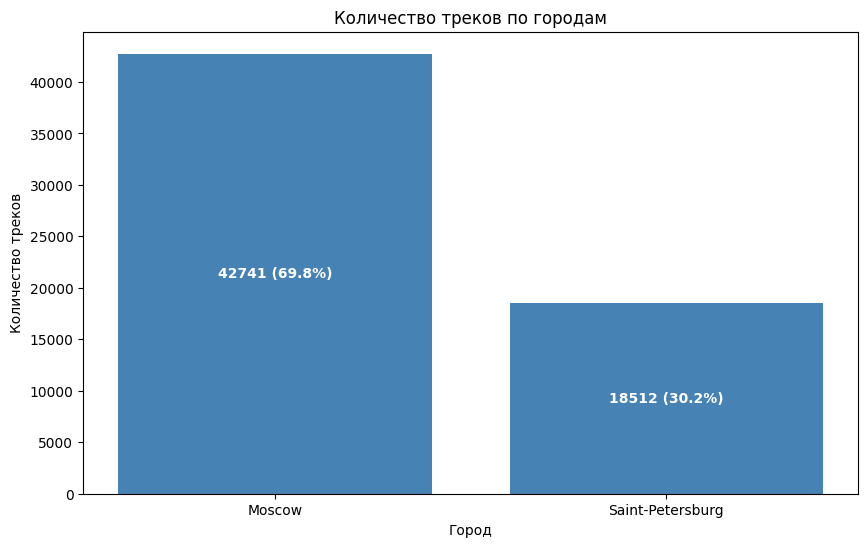

In [17]:
# Преобразуем в списки
labels = city_track_count.index.tolist()
sizes = city_track_count.values.tolist()

# Создаем график
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color='steelblue')

# Добавляем подписи внутри столбцов
for bar, size in zip(bars, sizes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval / 2, 
             f'{yval} ({yval / sum(sizes) * 100:.1f}%)', 
             ha='center', 
             va='center', 
             color='white', 
             weight='bold')

# Добавляем заголовок и метки осей
plt.title('Количество треков по городам')
plt.xlabel('Город')
plt.ylabel('Количество треков')

# Показываем график
plt.show()

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Теперь сгруппируем данные по дню недели и посчитаем прослушивания в понедельник, среду и пятницу (в данных есть информация о прослушиваниях только за эти дни). 

In [18]:
# Подсчёт прослушиваний в каждый из трёх дней
day_track_count = df.groupby('day')['track'].count()
day_track_count

day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64

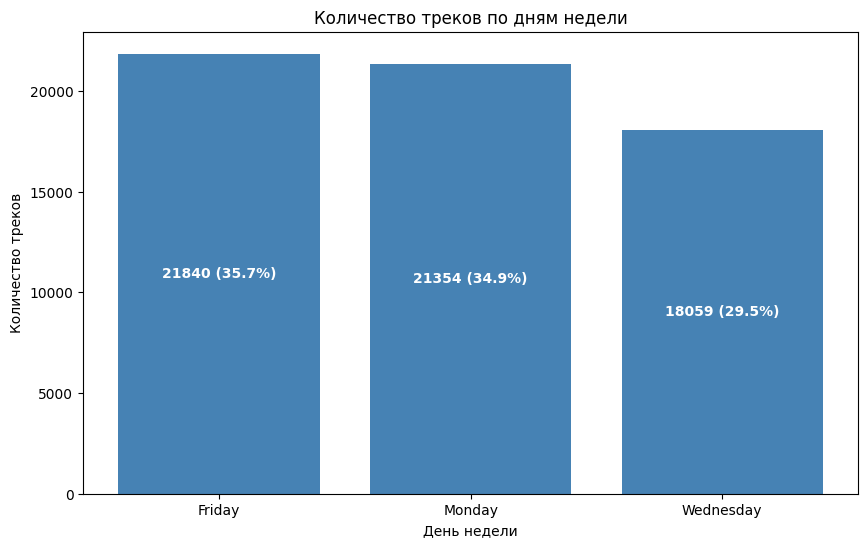

In [19]:
# Преобразуем в списки
labels = day_track_count.index.tolist()
sizes = day_track_count.values.tolist()

# Создаем график
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color='steelblue')

# Добавляем подписи внутри столбцов
for bar, size in zip(bars, sizes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval / 2, 
             f'{yval} ({yval / sum(sizes) * 100:.1f}%)', 
             ha='center', 
             va='center', 
             color='white', 
             weight='bold')

# Добавляем заголовок и метки осей
plt.title('Количество треков по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество треков')

# Показываем график
plt.show()

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Напишем функцию number_tracks(), которая посчитает прослушивания для заданного дня и города. Параметры функции: день недели, название города. 

In [20]:
# Объявляется функция с двумя параметрами: day, city.
def number_tracks(day, city):
    """
    Функция рассчитывает количество треков, прослушанных пользователями из определенного города в определенный день.

    Параметры:
    day: значение дня недели.
    city: наименование города.
    """
    track_list = df[(df['day']==day) & (df['city']==city)]
    track_list_count = track_list['user_id'].count()
    return(track_list_count)

In [21]:
# Получение уникальных комбинаций city и day
unique_combinations = df[['city', 'day']].drop_duplicates()

# Применение функции ко всем уникальным комбинациям
results = []
for index, row in unique_combinations.iterrows():
    city = row['city']
    day = row['day']
    count = number_tracks(day, city)
    results.append({'city': city, 'day': day, 'track_count': count})

# Преобразуем результаты в DataFrame
results_df = pd.DataFrame(results)

# Вывод результатов
results_df

,city,day,track_count
0,Saint-Petersburg,Wednesday,7003
1,Moscow,Friday,15945
2,Saint-Petersburg,Monday,5614
3,Moscow,Monday,15740
4,Saint-Petersburg,Friday,5895
5,Moscow,Wednesday,11056


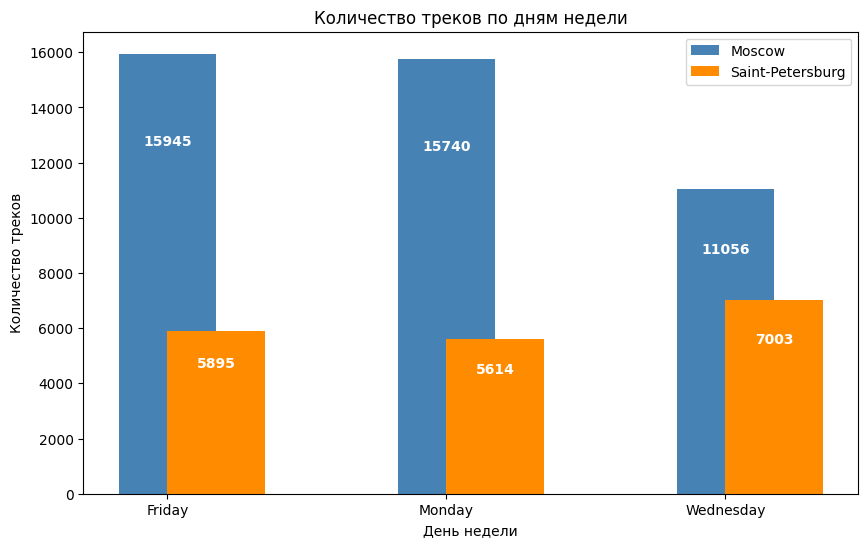

In [22]:
# Разделение данных по городам
moscow_data = results_df[results_df['city'] == 'Moscow']
spb_data = results_df[results_df['city'] == 'Saint-Petersburg']

# Создание графика
plt.figure(figsize=(10, 6))

# Построение сдвоенной столбчатой диаграммы
bar_width = 0.35
bar1 = plt.bar(moscow_data['day'], 
               moscow_data['track_count'], 
               width=bar_width, 
               label='Moscow', 
               align='center', 
               color='steelblue')

bar2 = plt.bar(spb_data['day'], 
               spb_data['track_count'], 
               width=bar_width, 
               label='Saint-Petersburg', 
               align='edge', 
               color='darkorange')

# Добавление подписей внутри столбцов
for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval * 0.8, 
             f'{int(yval)}', 
             ha='center', 
             va='center', 
             color='white', 
             weight='bold')

# Добавление заголовка и меток осей
plt.title('Количество треков по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество треков')
plt.legend()

# Отображение графика
plt.show()

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Также и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраним таблицы с данными в две переменные:

- по Москве - в moscow_general;
- по Санкт-Петербургу - в spb_general.

In [23]:
moscow_general = df[df['city'] == 'Moscow']
spb_general = df[df['city'] == 'Saint-Petersburg']

Создадим функцию genre_weekday() с четырьмя параметрами:

- таблица (датафрейм) с данными,
- день недели,
- начальная временная метка в формате 'hh:mm',
- последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанрах тех треков, которые прослушивали в указанный день в промежутке между двумя отметками времени.

In [24]:
def genre_weekday(df, day, time1, time2):
    genre_df = df[df['day'] == day]  
    genre_df = genre_df[genre_df['time'] < time2] 
    genre_df =  genre_df[genre_df['time'] > time1] 
    genre_df_grouped = genre_df.groupby('genre')['genre'].count() 
    genre_df_sorted = genre_df_grouped.sort_values(ascending=False) 
    genre_df_sorted = genre_df_sorted.reset_index(name='genre_count')
    return genre_df_sorted[:10]

Cравним результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

**Москва, понедельник, утро**

In [25]:
moscow_morning = genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

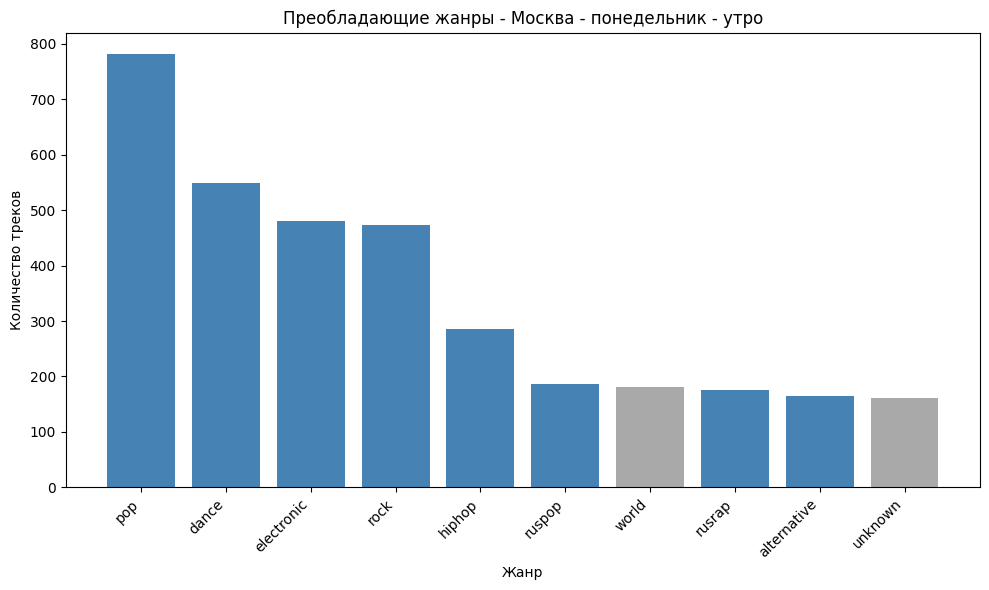

In [26]:
# Цвета для столбцов
colors = ['steelblue' if genre not in ['world', 'unknown'] else 'darkgrey' for genre in moscow_morning['genre']]

# Визуализируем распределение по жанрам
plt.figure(figsize=(10, 6))
plt.bar(moscow_morning['genre'], moscow_morning['genre_count'], color=colors)
plt.xlabel('Жанр')
plt.ylabel('Количество треков')
plt.title('Преобладающие жанры - Москва - понедельник - утро')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Санкт-Петербург, понедельник, утро**

In [27]:
spb_morning = genre_weekday(spb_general, 'Monday', '07:00', '11:00')

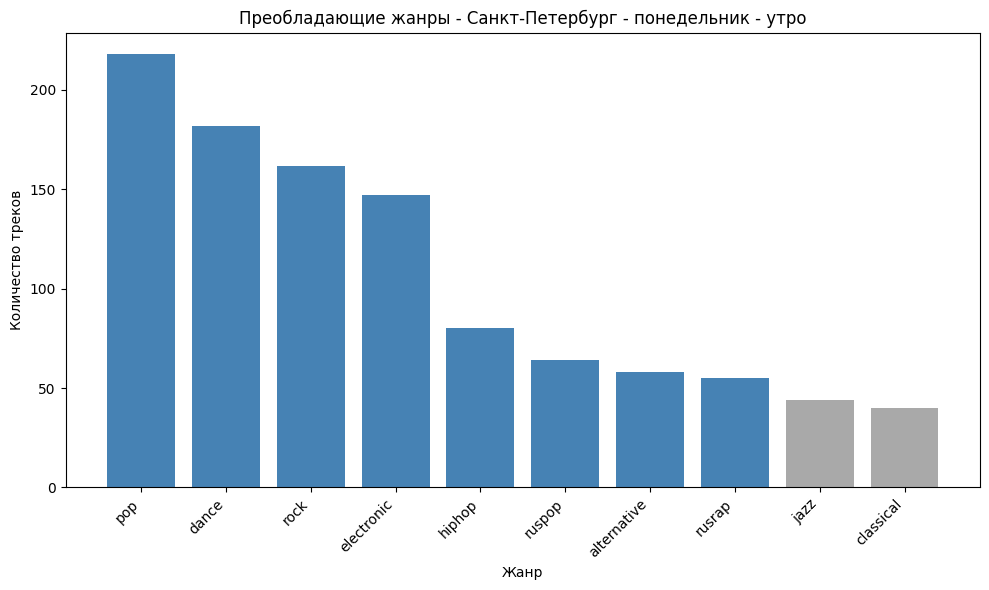

In [28]:
# Цвета для столбцов
colors = ['steelblue' if genre not in ['jazz', 'classical'] else 'darkgrey' for genre in spb_morning['genre']]

# Визуализируем распределение по жанрам
plt.figure(figsize=(10, 6))
plt.bar(spb_morning['genre'], spb_morning['genre_count'], color = colors)
plt.xlabel('Жанр')
plt.ylabel('Количество треков')
plt.title('Преобладающие жанры - Санкт-Петербург - понедельник - утро')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Москва, пятница, вечер**

In [29]:
moscow_evening = genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

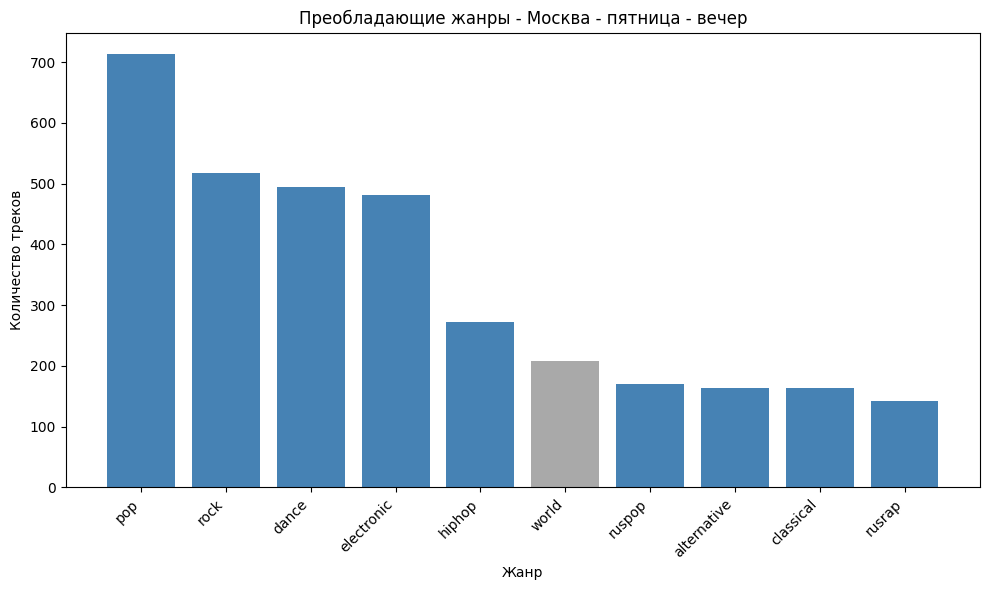

In [30]:
# Цвета для столбцов
colors = ['steelblue' if genre != 'world' else 'darkgrey' for genre in moscow_evening['genre']]

# Визуализируем распределение по жанрам
plt.figure(figsize=(10, 6))
plt.bar(moscow_evening['genre'], moscow_evening['genre_count'], color = colors)
plt.xlabel('Жанр')
plt.ylabel('Количество треков')
plt.title('Преобладающие жанры - Москва - пятница - вечер')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Санкт-Петербург, пятница, вечер**

In [31]:
spb_evening = genre_weekday(spb_general, 'Friday', '17:00', '23:00')

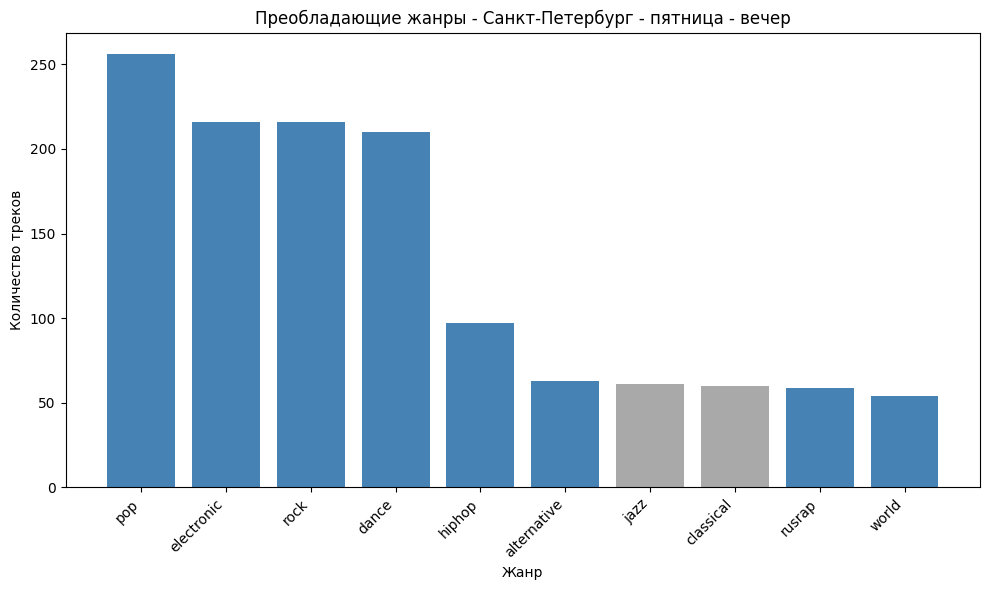

In [32]:
# Цвета для столбцов
colors = ['steelblue' if genre not in ['jazz', 'classical'] else 'darkgrey' for genre in spb_evening['genre']]

#Визуализируем распределение по жанрам
plt.figure(figsize=(10, 6))
plt.bar(spb_evening['genre'], spb_evening['genre_count'], color=colors)
plt.xlabel('Жанр')
plt.ylabel('Количество треков')
plt.title('Преобладающие жанры - Санкт-Петербург - пятница - вечер')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное различие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируем таблицу `moscow_general` по жанру и посчитаем прослушивания треков каждого жанра методом `count()`. Затем отсортируем результат в порядке убывания и сохраним его в таблице `moscow_genres`. 

In [33]:
moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending=False)
moscow_genres_top = moscow_genres.head(10).to_frame(name='genre_count').reset_index()

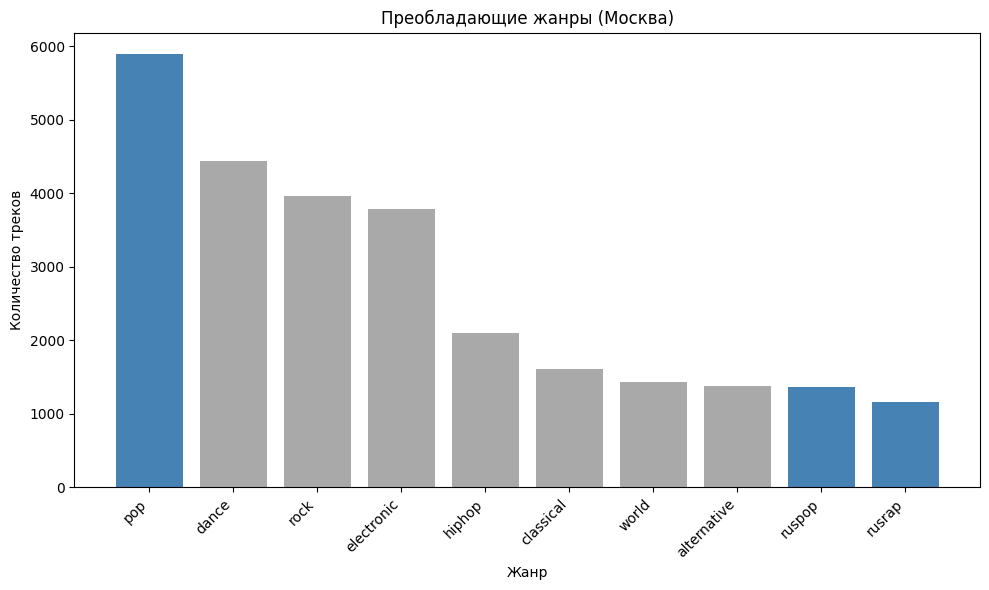

In [34]:
# Цвета для столбцов
colors = ['darkgrey' if genre not in ['pop', 'ruspop', 'rap', 'rusrap'] else 'steelblue' for genre in moscow_genres_top['genre']]

# Визуализируем распределение по жанрам
plt.figure(figsize=(10, 6))
plt.bar(moscow_genres_top['genre'], moscow_genres_top['genre_count'], color = colors)
plt.xlabel('Жанр')
plt.ylabel('Количество треков')
plt.title('Преобладающие жанры (Москва)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Теперь повторим процедуру для отражения топ-10 популярных жанров в Санкт-Петербурге:

In [35]:
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending=False)
spb_genres_top = spb_genres.head(10).to_frame(name='genre_count').reset_index()

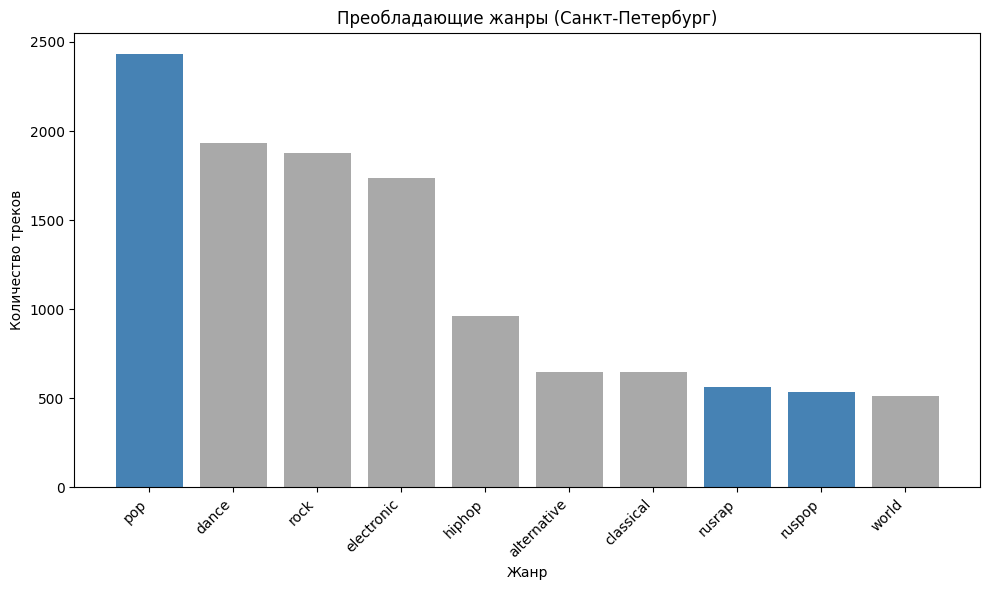

In [36]:
# Цвета для столбцов
colors = ['darkgrey' if genre not in ['pop', 'ruspop', 'rap', 'rusrap'] else 'steelblue' for genre in spb_genres_top['genre']]

# Визуализируем распределение по жанрам
plt.figure(figsize=(10, 6))
plt.bar(spb_genres_top['genre'], spb_genres_top['genre_count'], color = colors)
plt.xlabel('Жанр')
plt.ylabel('Количество треков')
plt.title('Преобладающие жанры (Санкт-Петербург)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Гипотеза частично подтвердилась:

* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге.

## Итоги исследования

В рамках исследования были проверены три гипотезы и установлено:

1. Первая гипотеза польностью подтвердилась: день недели по-разному влияет на активность пользователей в Москве и Петербурге.

2.  Вторая гипотеза подтвердилась частично: музыкальные предпочтения не сильно меняются в течение недели - будь то Москва или Петербург. Небольшое различия заметны в начале недели, по понедельникам: в Москве слушают музыку жанра `world`, в Петербурге - джаз и классику. (Этот результат мог оказаться иным, если бы не пропуски в данных.)

3.  Третья гипотеза не подтвердилась: во вкусах пользователей Москвы и Петербурга больше общего, чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские. Если различия в предпочтениях  существуют, на основной массе пользователей они не заметны. 